In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])


In [8]:
#r_off

profundidade = 7.75 *1e-3

r_off = profundidade/2
r_off_err = 0.03 *1e-3

print(f'r_off = ({r_off * 1e3} +- {r_off_err * 1e3}) mm')

#V_fundo

V_1_fundo = -4.1 *1e-3
V_2_fundo = -3.8*1e-3
V_fundo_err = 0.1*1e-3

r_off = (3.875 +- 0.030000000000000002) mm


In [9]:
#Dados

r = np.array([1,2,3,4,5,6,7,8,9,10,11]) * 1e-2
r += r_off
r_err = 0.05 *1e-2

V_1 = -(np.array([105.5,64.3,42.2,32.4,25.8,21.6,18.3,15.7,14.3,12.6,11.8])*1e-3 - V_1_fundo)
V_2 = np.array([54.4,31.6,22.2,16.9,13.6,11.3,9.8,8.6,8.0,7.3,5.8])*1e-3 - V_2_fundo

V_err = 0.1*1e-3 + V_fundo_err

In [10]:
#Converter para Campo Magnético

A = 0.003472442866550257
A_err = 2.6927087730399573*1e-05

B_1 = V_1 * A
B_1_err = A*V_err + np.abs(V_1)*A_err

B_2 = V_2 * A
B_2_err = A*V_err + V_2*A_err

In [11]:
#Modelos teóricos
N=30
mu = 4*np.pi *1e-7
L = 0.85

def B(r, I):
    return mu * I * N / (2* np.pi * r)

I_1 = -1
I_2 = 0.5

#I_1 = -1*0.7
#I_2 = 0.3

r_t = np.linspace(r[0], r[-1], 500)
    

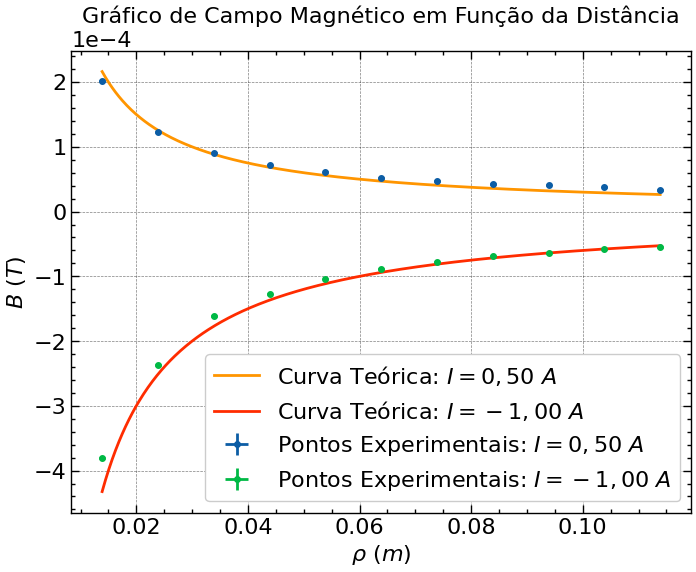

In [12]:
plt.errorbar(r, B_2, xerr=r_err, yerr= B_2_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais: $I = 0,50 \ A$')
plt.errorbar(r, B_1, xerr=r_err, yerr= B_1_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais: $I = -1,00 \ A$')

plt.plot(r_t, B(r_t, I_2), label = 'Curva Teórica: $I = 0,50 \ A$')
plt.plot(r_t, B(r_t, I_1), label = 'Curva Teórica: $I = -1,00 \ A$')

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.xlabel(r"$\rho \ (m)$")
plt.ylabel(r"$B \ (T)$")
plt.title("Gráfico de Campo Magnético em Função da Distância")

plt.legend()